In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from model import VoxelFlow
from dataset import Dataset
from torch.utils.data import DataLoader

In [2]:
models_path = {
    "pong#1" : "wandb/run-20220708_002006-1jms7ynh/files/PongNoFrameskip-v4.pt"
}

In [3]:
ENV = "PongNoFrameskip-v4" # "MsPacmanNoFrameskip-v4"
data_path = f"data/{ENV}"
NUM_EPS = 61
MAX_EP_LEN = 100

model = VoxelFlow()
model_path = models_path["pong#1"]
model.load_state_dict(torch.load(model_path, map_location='cuda:2'))
model.eval(); #; suppress output

In [4]:
dataset = Dataset(data_path, range(NUM_EPS), MAX_EP_LEN)
loader = DataLoader(dataset, 16, shuffle=True)

In [9]:
with torch.no_grad():
    for inp, target in loader:
        break

    # inp[:,3:,:,:] = inp[:,:3,:,:]

    import time
    s = time.time()
    out = model(inp)
    print("inf time:", time.time()-s)
    x1 = inp[:, :3, :, :]
    x2 = inp[:, 3:, :, :]

inf time: 14.38159441947937


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


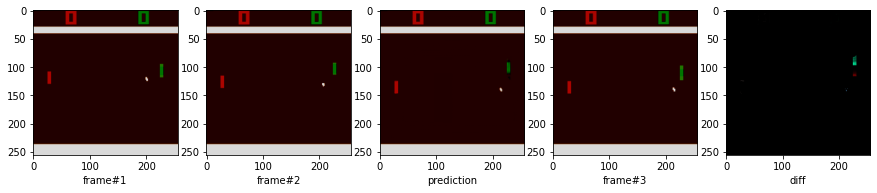

In [10]:
fig, ax = plt.subplots(1, 5, figsize=(15, 15))
idx = 15

ax[0].imshow(x1[idx].permute([1, 2, 0]).detach().numpy(), cmap='gray')
ax[0].set_xlabel("frame#1")
ax[1].imshow(x2[idx].permute([1, 2, 0]).detach().numpy())
ax[1].set_xlabel("frame#2")
ax[2].imshow(out[idx].permute([1, 2, 0]).detach().numpy())
ax[2].set_xlabel("prediction")
ax[3].imshow(target[idx].permute([1, 2, 0]).detach().numpy())
ax[3].set_xlabel("frame#3")
ax[4].imshow((out[idx]-target[idx]).permute([1, 2, 0]).detach().numpy())
ax[4].set_xlabel("diff");